In [148]:
import numpy as np
import matplotlib.pyplot as plt
import numpy.random as rnd
import pandas as pd

In [149]:
# Create random 2d data
mu = np.array([10,13])
sigma = np.array([[3.5, -1.8], [-1.8,3.5]])

print("Mu ", mu.shape)
print("Sigma ", sigma.shape)

# Create 100 samples using mean and sigma
org_data = rnd.multivariate_normal(mu, sigma, size=(100))
print("Data shape ", org_data.shape)

Mu  (2,)
Sigma  (2, 2)
Data shape  (100, 2)


In [150]:
org_data

array([[10.0633074 , 13.69496755],
       [12.30710538, 12.46273721],
       [ 7.96738524, 12.73068981],
       [11.01894326, 10.52590315],
       [11.59410528, 13.66811973],
       [ 7.91420871, 11.45643107],
       [10.12464294, 13.01045496],
       [11.46949168, 13.18291064],
       [11.22122736,  9.79049964],
       [10.14709235, 18.03772161],
       [12.43947559, 13.0282946 ],
       [12.24006529,  9.88663618],
       [10.02585969, 13.80423894],
       [ 9.83819334, 13.52572905],
       [11.33703408,  7.65259257],
       [10.42464691, 13.24141978],
       [10.18133371, 16.01836649],
       [11.18237667, 12.02412925],
       [12.73170389, 12.36127217],
       [ 9.62164617, 14.49101091],
       [12.23202271, 14.76786064],
       [ 7.58050363, 14.18864981],
       [10.11499127, 13.64945408],
       [ 9.97409662, 13.63927841],
       [13.01567475, 10.40130703],
       [ 9.54683069, 13.80297376],
       [11.31402218, 11.04423177],
       [10.67091133, 14.60810296],
       [12.63598651,

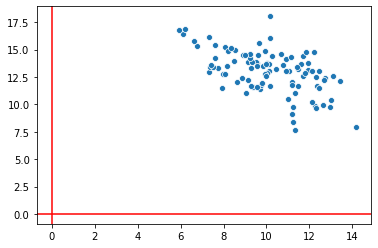

In [151]:
plt.axvline(x=0, ymin=0, ymax=1, c='red')
plt.axhline(y=0, xmin=0, xmax=1, c='red')
sns.scatterplot(org_data[:,0], org_data[:,1])
plt.show()

In [152]:
org_data.shape[0]

100

In [153]:
mean = np.mean(org_data, axis= 0)
mean_data = org_data - mean
print("Data sau khi trừ đi mean của từng giá trị ", mean.shape, "\n")

Data sau khi trừ đi mean của từng giá trị  (2,) 



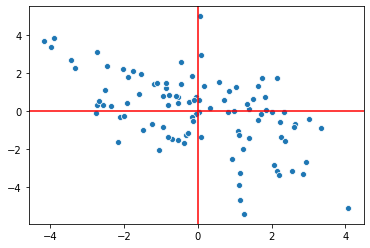

In [154]:
plt.axvline(x=0, ymin=0, ymax=1, c='red')
plt.axhline(y=0, xmin=0, xmax=1, c='red')
sns.scatterplot(x=mean_data[:,0], y=mean_data[:,1])
plt.show()

In [155]:
# Compute covariance matrix
cov = np.cov(org_data.T) / org_data.shape[0]
print("Covariance matrix ", cov.shape, "\n")

Covariance matrix  (2, 2) 



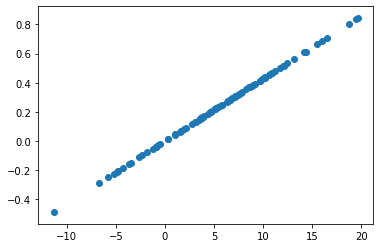

In [156]:
org_data=np.cov(org_data)
plt.scatter(org_data[:, 0], org_data[:, 1])
plt.show()

In [157]:
eig_val, eig_vec = np.linalg.eig(cov)

In [158]:
sorted_index = eig_val.argsort()[::-1]
eig_val = eig_val[sorted_index]
eig_vec = eig_vec[:,sorted_index]

In [159]:
n_components = 1

In [160]:
pca_data = mean_data.dot(eig_vec[:, :n_components])
print("Transformed data ", pca_data.shape)

Transformed data  (100, 1)


In [161]:
pca_data

array([[-0.50051202],
       [ 1.9222072 ],
       [-1.20111966],
       [ 2.48447969],
       [ 0.55123006],
       [-0.29574765],
       [ 0.04644258],
       [ 0.82562279],
       [ 3.1640378 ],
       [-3.6517639 ],
       [ 1.59369475],
       [ 3.77982641],
       [-0.60646774],
       [-0.52725516],
       [ 4.82124655],
       [ 0.0780755 ],
       [-2.13710557],
       [ 1.48800064],
       [ 2.28337528],
       [-1.38622533],
       [ 0.16893786],
       [-2.53882404],
       [-0.43205385],
       [-0.51951481],
       [ 3.92250851],
       [-0.92844678],
       [ 2.30053426],
       [-0.76540429],
       [ 4.01462944],
       [-2.46763083],
       [-4.15167498],
       [ 0.63937205],
       [-5.17991612],
       [ 0.78032144],
       [-0.03612714],
       [ 0.96204998],
       [-1.80980679],
       [-0.2820835 ],
       [-1.80612428],
       [ 2.89795145],
       [-1.73833992],
       [ 0.69488806],
       [-3.01538301],
       [ 0.59318909],
       [-0.98969262],
       [ 4

EX2

In [98]:

url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
data = pd.read_csv(url, names=['sepal length','sepal width','petal length','petal width','target'])

In [99]:
data

,sepal length,sepal width,petal length,petal width,target
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [104]:
features = ['sepal length', 'sepal width', 'petal length', 'petal width']
data = data.loc[:, features].values

In [105]:
data = data - data.mean(axis=0)

In [107]:
data_std = data/ np.std(data, axis=0)
cov_mat = np.cov(data_std.T)

In [108]:
e, v = np.linalg.eig(cov_mat)
print('E-value:', e)
print('E-vector', v)

E-value: [2.93035378 0.92740362 0.14834223 0.02074601]
E-vector [[ 0.52237162 -0.37231836 -0.72101681  0.26199559]
 [-0.26335492 -0.92555649  0.24203288 -0.12413481]
 [ 0.58125401 -0.02109478  0.14089226 -0.80115427]
 [ 0.56561105 -0.06541577  0.6338014   0.52354627]]


In [109]:
max_vec = v[:, e.argsort()[::-1][:2]]
print(max_vec)

[[ 0.52237162 -0.37231836]
 [-0.26335492 -0.92555649]
 [ 0.58125401 -0.02109478]
 [ 0.56561105 -0.06541577]]


In [110]:
data = data_std.dot(max_vec)

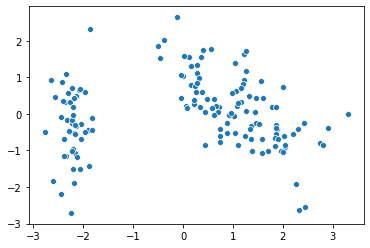

In [113]:
sns.scatterplot(data[:,0], data[:,1])

EX3

In [117]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
data_new = pca.fit_transform(data)

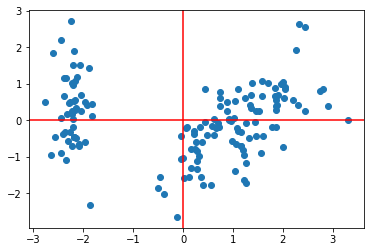

In [119]:
plt.scatter(data_new[:,0], data_new[:,1])
plt.axvline(x=0, ymin=0, ymax=1, lw=1.5, label='boudary', c='red')
plt.axhline(y=0, xmin=0, xmax=1, lw=1.5, c='red')
plt.show()